In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import glob

FONTSIZE=18
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=FONTSIZE

In [3]:
filenames=glob.glob('./results/*.pkl')
results=[]

for i in filenames:
    fp = open(i, "rb")
    results_temp = pickle.load(fp)
    fp.close()
    
    results.append(results_temp)

In [6]:
fp=open('./results/ConvGan_linear_Gstrides_12_2_Dstrides_12_2_results_e004.pkl','rb')
results=pickle.load(fp)
fp.close()

In [7]:
print(results.keys())

dict_keys(['args', 'd_loss', 'g_loss', 'acc_real', 'acc_fake', 'fname_base'])


Text(0, 0.5, 'Loss')

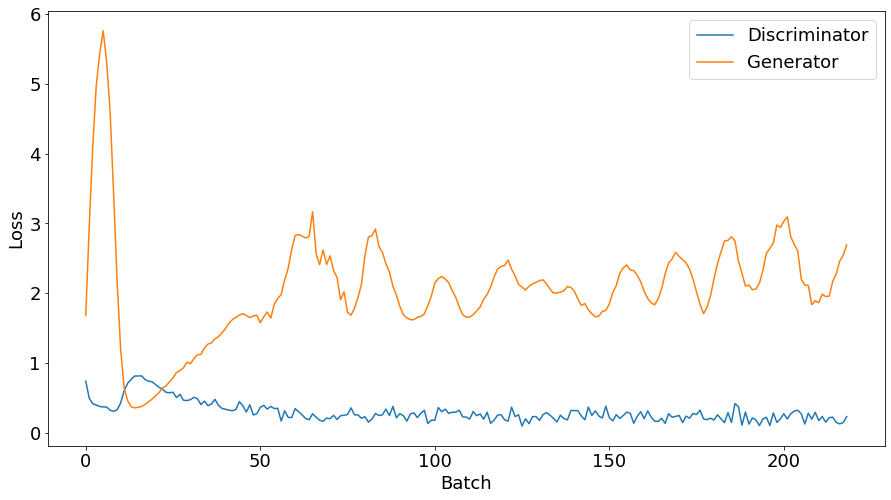

In [8]:
epochs=np.arange(len(results['d_loss']))
plt.plot(epochs,results['d_loss'],label='Discriminator')
plt.plot(epochs,results['g_loss'],label='Generator')
plt.legend(loc='best')
plt.xlabel('Batch')
plt.ylabel('Loss')